In [1]:
from drivers.keysight81150a import Keysight81150a
from drivers.keysightdsox3024a import Dsox3024a
from measurement_waveforms.discrete_waveform import HysteresisLoop, ThreePulsePund
from pyvisa import ResourceManager
from analysis.hysteresis import process_raw_hyst
from analysis.pund import process_raw_3pp
import numpy as np

In [2]:
rm = ResourceManager()
rm.list_resources()

('GPIB0::7::INSTR', 'GPIB0::8::INSTR')

In [3]:
awg = Keysight81150a('VIRTUAL')
scope = Dsox3024a('VIRTUAL')
print(awg.idn())
print(scope.idn())

INITIALIZING VIRTUAL RESOURCE MANAGER, VISA NOT CONNECTED
INITIALIZING VIRTUAL RESOURCE MANAGER, VISA NOT CONNECTED
VirtualInstrument,Model1234,Serial123456,1.0
VirtualInstrument,Model1234,Serial123456,1.0


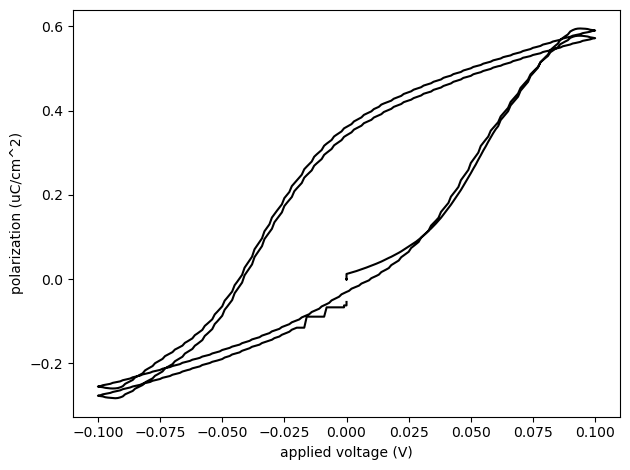

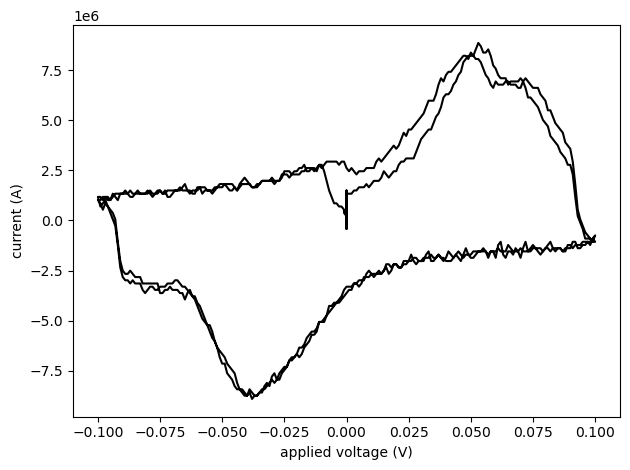

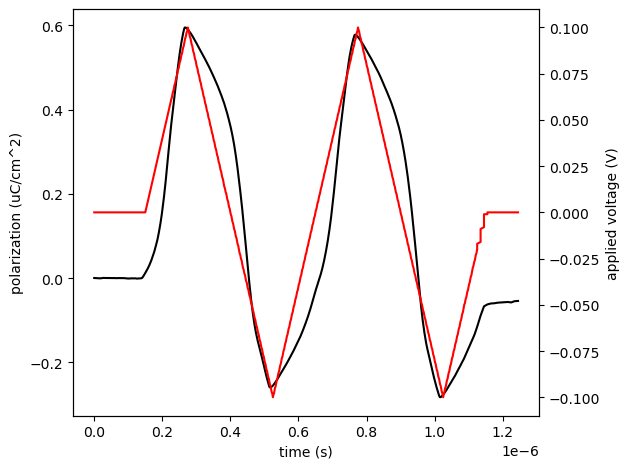

In [4]:
process_raw_hyst(r'\\files22.brown.edu\Research\ENG_Caretta_Shared\Group\probe_station\mr0212test\3_hysteresis_0p1V_1000000Hz.csv',
                 show_plots=True, save_plots=True)

Estimated Peak-to-Peak Ratio of targetted value is 100.0%
Capturing waveform of type hysteresis for 1e-06 seconds...
Waveform captured.
Waveform data saved to \\files22.brown.edu\Research\ENG_Caretta_Shared\Group\probe_station\mr0212test\3_hysteresis_0p1V_1000000Hz.csv


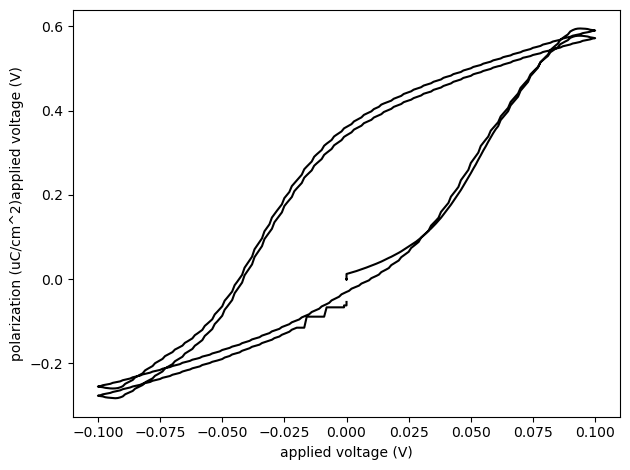

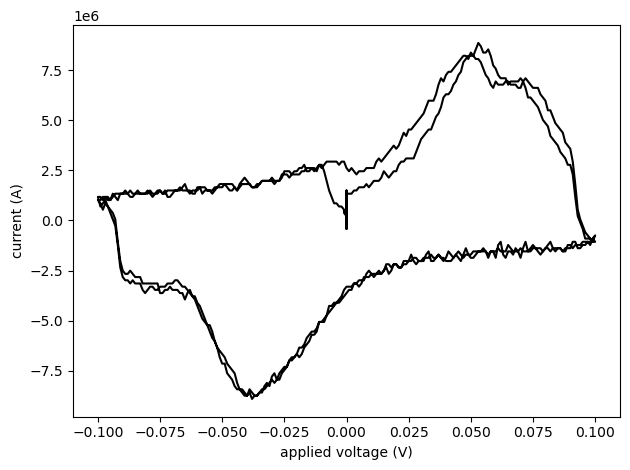

KeyError: ('applied voltage (V)',)

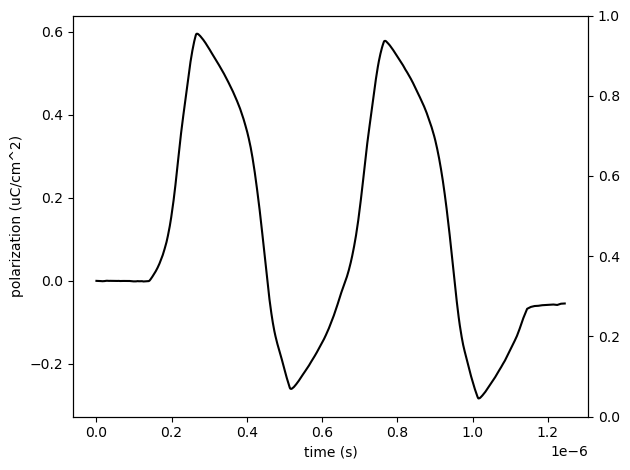

In [4]:
path = r"\\files22.brown.edu\Research\ENG_Caretta_Shared\Group\probe_station\mr0212test"

experiment = HysteresisLoop(awg, scope,
                            amplitude=0.1, frequency=1.0e6, v_div=0.01,
                            n_cycles=2, area=3.14*4e-5**2, time_offset=1.5e-7,
                            save_dir=path, save_plots=True, show_plots=True)

experiment.run_experiment()

Estimated Peak-to-Peak Ratio of targetted value is 100.0%
AWG configured for a PUND pulse.
Capturing waveform of type 3pulsepund for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\mr0212test\0_3pulsepund_1p0Vres_1p0Vpu.csv


KeyError: ('applied voltage (V)',)

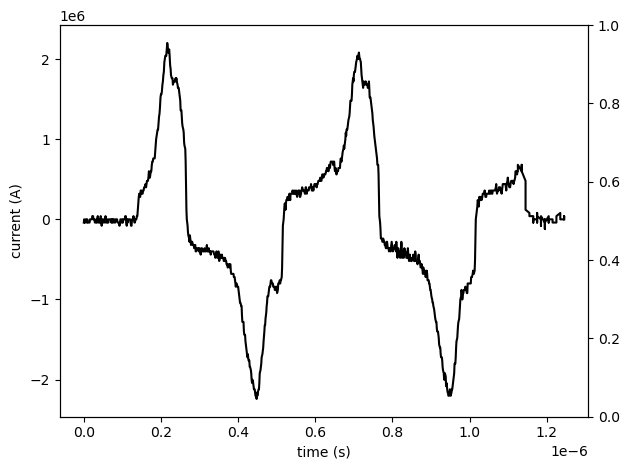

In [6]:
voltage = 1.0
reset = 1.0
vdiv = 0.2
area = 3.14*8e-5**2
capname = '4um_A0'

path = r"C:\Users\adqua\OneDrive\Documents\Lab\data\mr0212test"


experiment = ThreePulsePund(awg, scope, reset_amp=reset, reset_delay=1e-7, reset_width=1e-7,
                                        p_u_amp=voltage, p_u_delay=1e-7, p_u_width=1e-7,
                                        v_div=vdiv, area=area, save_dir=path)
experiment.run_experiment()

Estimated Peak-to-Peak Ratio of targetted value is 51.7%
AWG configured for a PUND pulse.
Capturing waveform of type 3PP for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\sz5nmHZO400C\\0p1_100ns_3pp_5um_data.csv
Estimated Peak-to-Peak Ratio of targetted value is 53.3%
AWG configured for a PUND pulse.
Capturing waveform of type 3PP for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\sz5nmHZO400C\\0p2_100ns_3pp_5um_data.csv
Estimated Peak-to-Peak Ratio of targetted value is 55.0%
AWG configured for a PUND pulse.
Capturing waveform of type 3PP for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\sz5nmHZO400C\\0p30000000000000004_100ns_3pp_5um_data.csv
Estimated Peak-to-Peak Ratio of targetted value is 56.7%
AWG configured for a PUND pulse.
Capturing waveform of type 3PP for 6e-07 seconds...
Waveform captured.
Waveform data saved

c:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Estimated Peak-to-Peak Ratio of targetted value is 70.0%
AWG configured for a PUND pulse.
Capturing waveform of type 3PP for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\sz5nmHZO400C\\1p2000000000000002_100ns_3pp_5um_data.csv


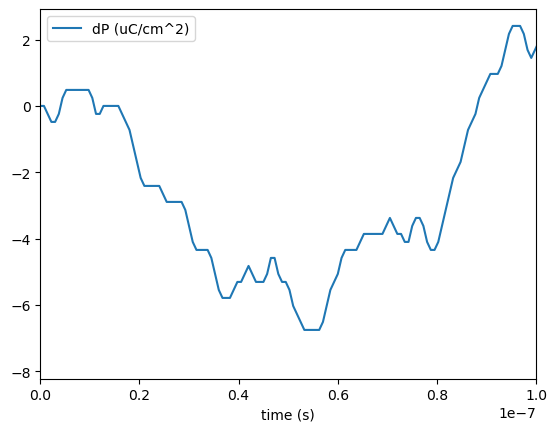

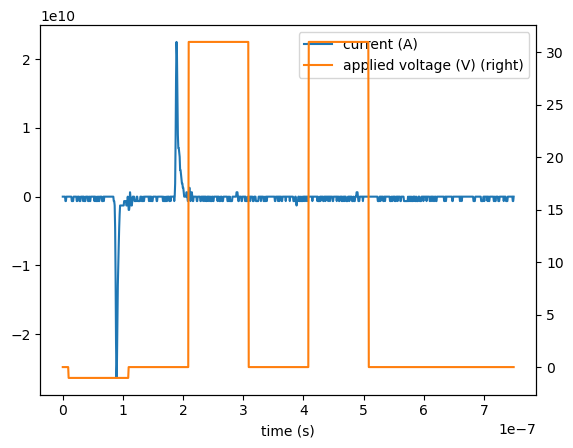

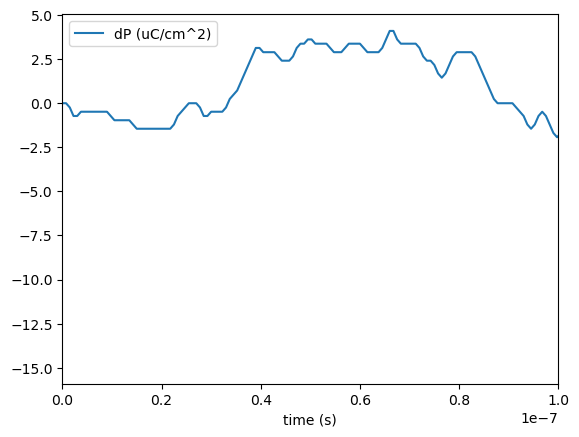

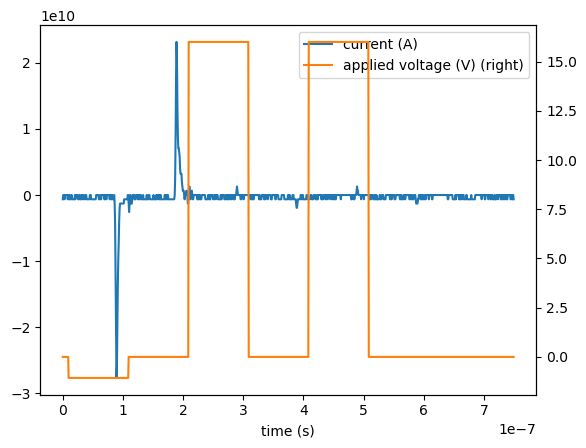

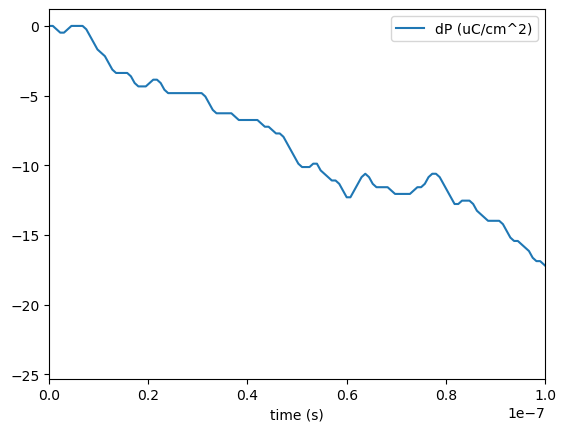

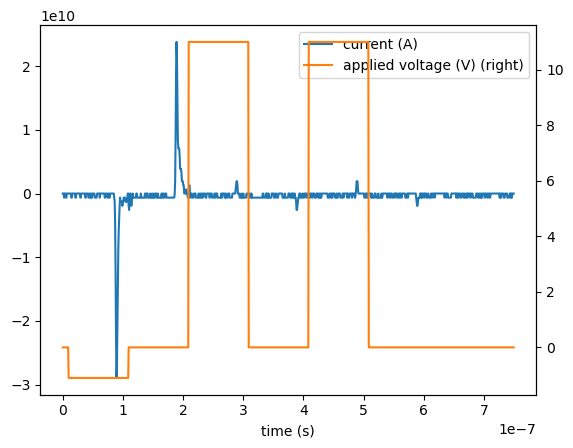

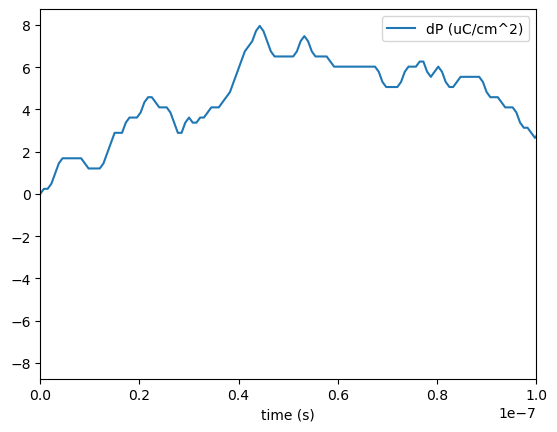

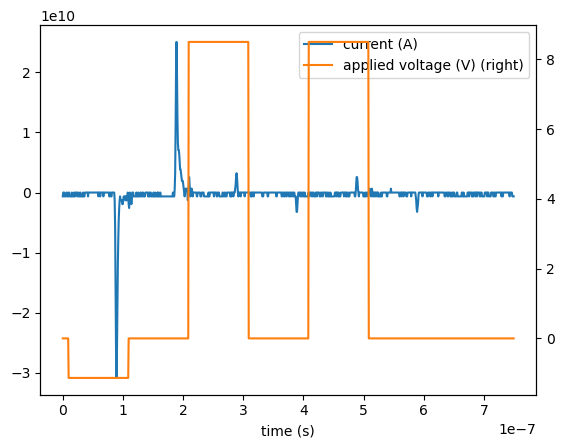

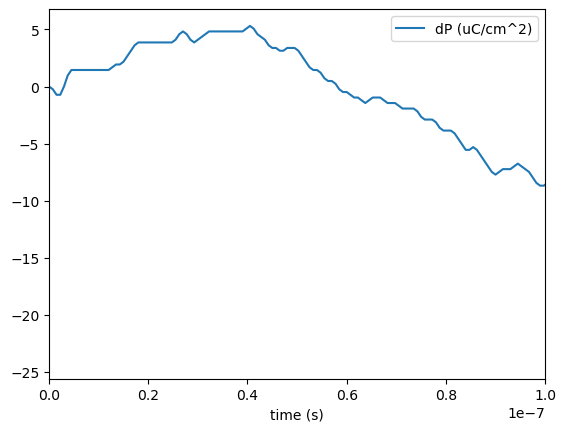

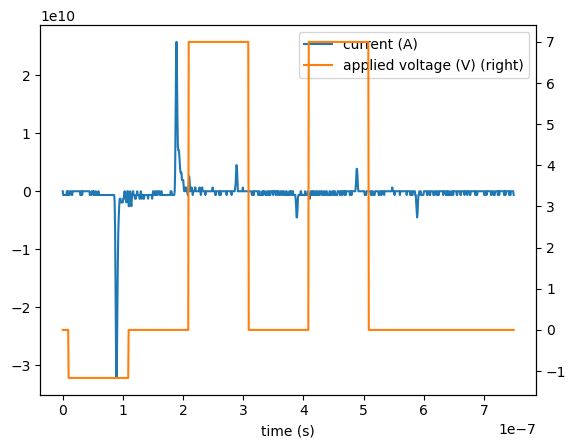

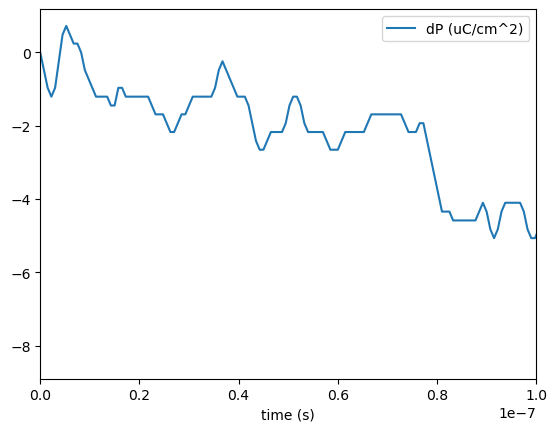

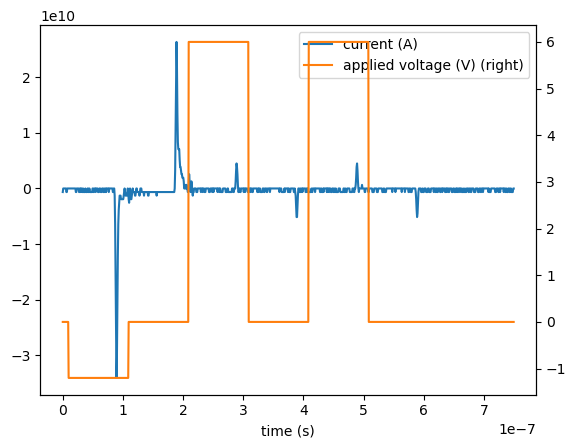

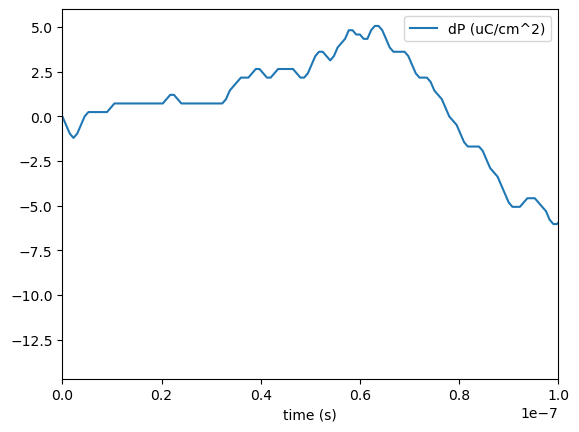

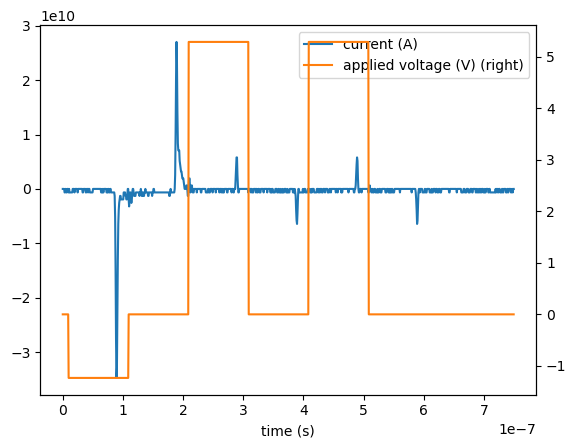

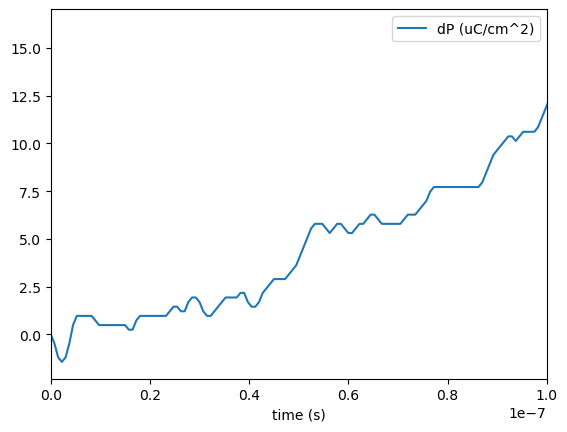

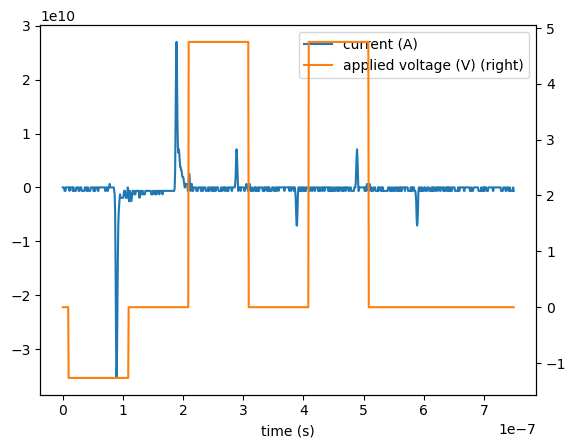

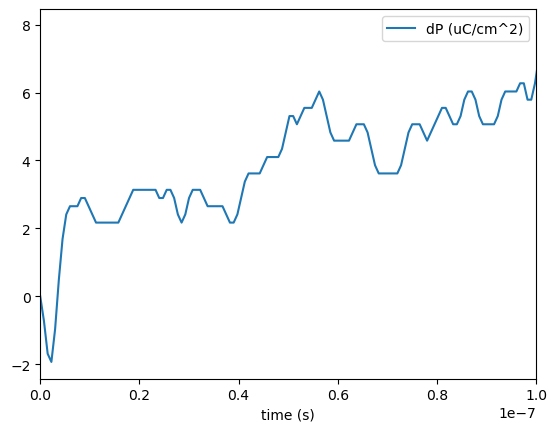

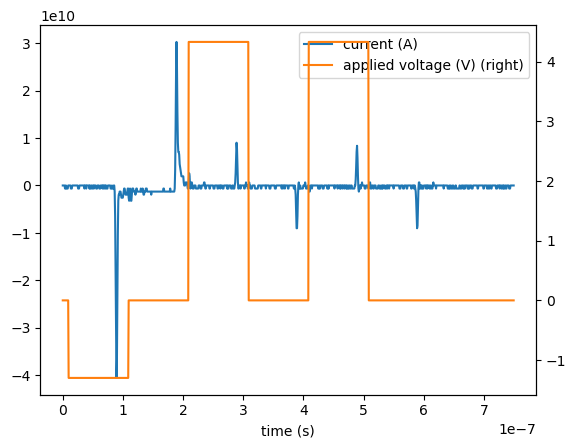

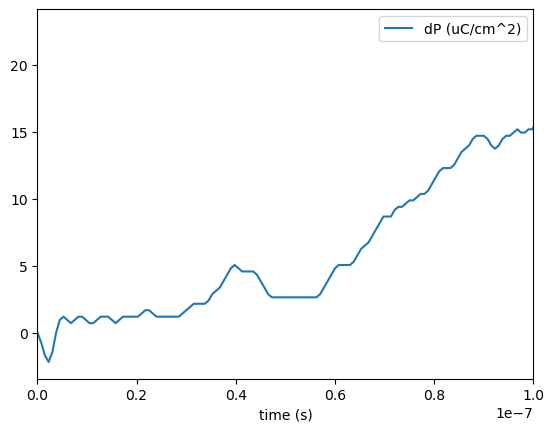

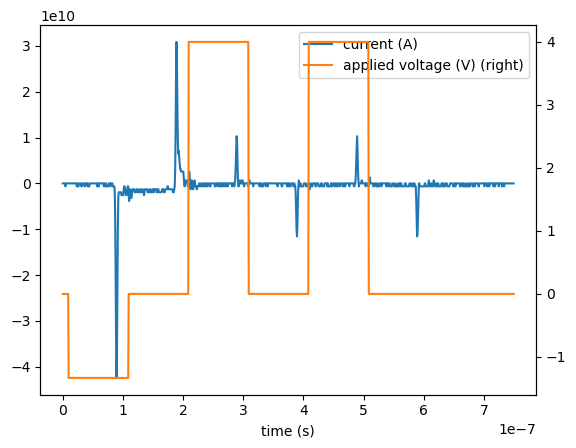

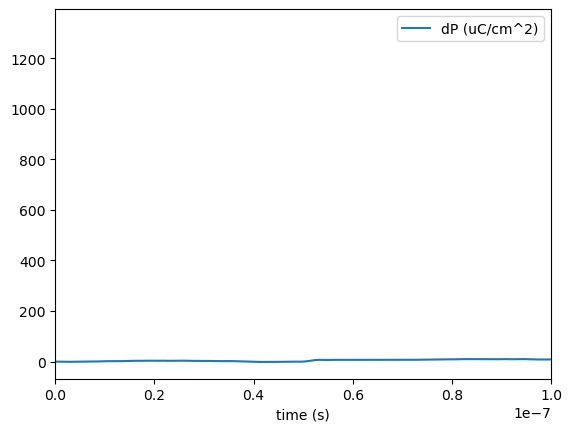

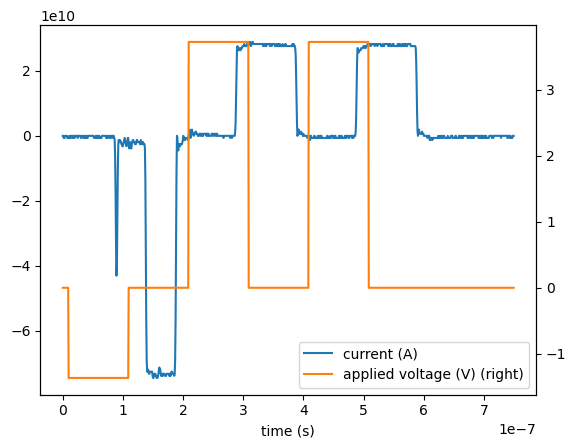

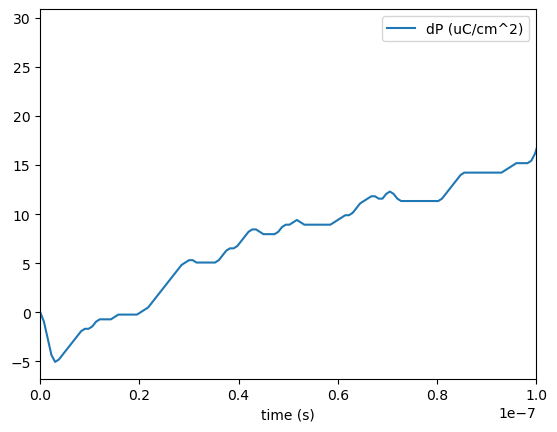

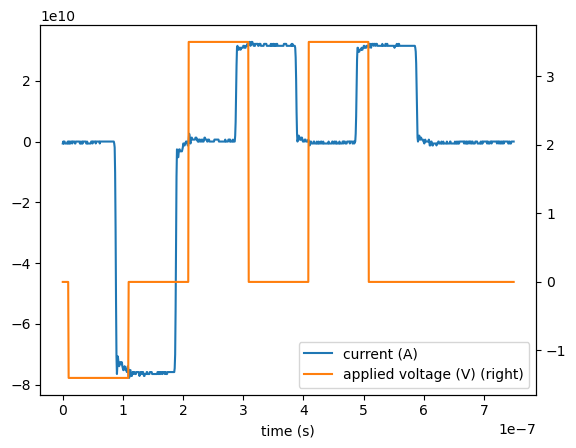

In [5]:
for voltage in np.linspace(.1,2.0,0.1):
    path = r"C:\Users\adqua\OneDrive\Documents\Lab\data\sz10nmHZO\\" +str(voltage).replace('.','p')+ "_100ns_3pp_5um_data.csv"

    vdiv = 0.2

    experiment = ThreePulsePund(awg, scope, reset_amp=3.0, reset_delay=1e-7, reset_width=1e-7,
                                            p_u_amp=voltage, p_u_delay=1e-7, p_u_width=1e-7,
                                            v_div=vdiv, area=0.5e-5*0.5e-5)
    experiment.run_experiment(save_path=path)
    process_raw_3pp(path, show_plots=True, save_plots=True, auto_timeshift=True)

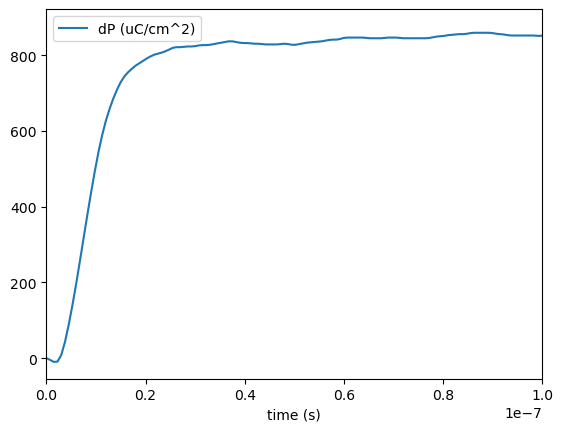

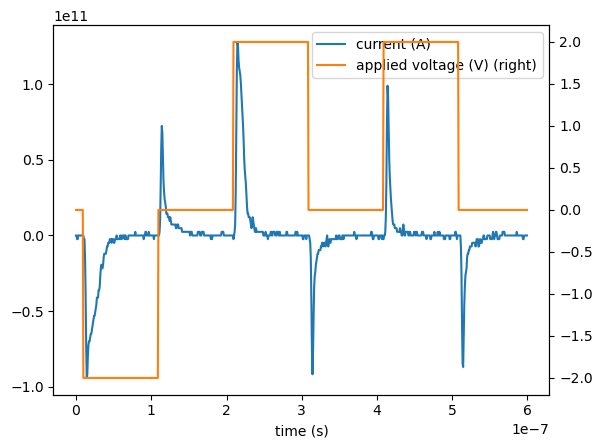

In [6]:
process_raw_3pp(r'C:\Users\adqua\OneDrive\Documents\Lab\data\virtual\4V_virtual_10nmHZO_3pp_data.csv', show_plots=True, save_plots=True, auto_timeshift=True)

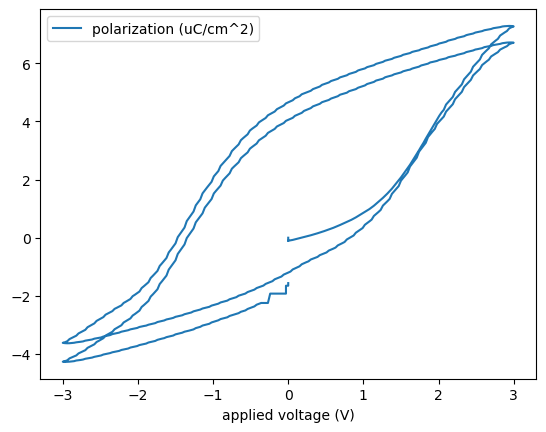

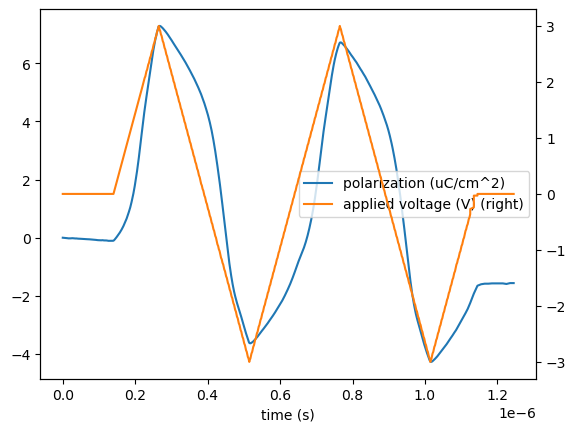

In [ ]:
process_raw_hyst(r'C:\Users\adqua\OneDrive\Documents\Lab\data\virtual\3V_1kHz_hyst_data.csv', show_plots=True, save_plots=True, auto_timeshift=False)

In [5]:
amp = 2.5
delay = 1.0e-7
experiment = ThreePulsePund(awg, scope, v_div=0.2, reset_amp=amp, p_u_amp=amp, reset_delay=delay, reset_width=delay, p_u_delay=delay, p_u_width=delay)
experiment.run_experiment(save_path=r"C:\Users\adqua\OneDrive\Documents\Lab\virtual_pund_data.csv")

Estimated Peak-to-Peak Ratio of targetted value is 100.0%
QUERY:  :DATA:CAT?  NOT IN virtual_scpi_queries.json
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\virtual_pund_data.csv


In [12]:
import numpy as np

In [18]:
amp = 2.5
delay = 1.0e-7

voltages = np.linspace(0,amp,20)

experiment = PUNDPulse(awg, scope, v_div=0.3, reset_amp=amp, p_u_amp=amp, reset_delay=delay, reset_width=delay, p_u_delay=delay, p_u_width=delay)
for v in voltages:
    experiment.p_u_amp = v
    experiment.run_experiment(save_path=r"C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_"+str(v).replace('.','p')[:4]+r"V_pund_data.csv")

c:\Users\adqua\Documents\GitHub\PIEC\src\piec\measurement_waveforms\discrete_waveform.py:220: RuntimeWarning: divide by zero encountered in scalar divide
  frac_p_u_amp = amplitude/self.p_u_amp
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\function_base.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  delta = stop - start
c:\Users\adqua\Documents\GitHub\PIEC\src\piec\drivers\scpi_instrument.py:765: RuntimeWarning: invalid value encountered in cast
  return scaled_data.astype(np.int32)


CAN NOT PRESERVE WF OVER HALF OF RESOLUTION IS GONE
Estimated Peak-to-Peak Ratio of targetted value is nan%
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_0p0V_pund_data.csv
CAN NOT PRESERVE WF OVER HALF OF RESOLUTION IS GONE
Estimated Peak-to-Peak Ratio of targetted value is 52.6%
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_0p13V_pund_data.csv
Estimated Peak-to-Peak Ratio of targetted value is 55.3%
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_0p26V_pund_data.csv
Estimated Peak-to-Peak Ratio of targetted value is 57.8%
AWG configured for a PUND pulse.
Capturing wavefo